In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import pickle
import cv2
import random 
import os
import pathlib
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.optimizers import Adam
from keras import initializers
from keras.utils import plot_model, np_utils
from keras import backend as keras

In [3]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [4]:
%cd /content/MyDrive/MyDrive/Dataset
data = pathlib.Path('/content/MyDrive/MyDrive/Dataset') 

/content/MyDrive/MyDrive/Dataset


##Load Dataset

In [6]:

class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                 

                train_folder_path = os.path.join(self.PATH, categories)                        
                class_index = self.CATEGORIES.index(categories)                                 

                for img in os.listdir(train_folder_path):                                       
                    new_path = os.path.join(train_folder_path, img)                             
                    try:        
                        image_data_temp = cv2.imread(new_path)                 
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            for x in data:
                self.x_data.append(x[0])        
                self.y_data.append(x[1])        

            X_Data = np.asarray(self.x_data) / (255.0)      
            Y_Data = np.asarray(self.y_data)


            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        X_Data,Y_Data = self.Process_Image()

        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:

            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data
class MasterImage2(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  

                train_folder_path = os.path.join(self.PATH, categories)                         
                class_index = self.CATEGORIES.index(categories)                                

                for img in os.listdir(train_folder_path):                                      
                    new_path = os.path.join(train_folder_path, img)                            

                    try:       
                        image_data_temp = cv2.imread(new_path)                
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            
            for x in data:
                self.x_data.append(x[0])        
                self.y_data.append(x[1])       

            X_Data = np.asarray(self.x_data) / (255.0)     
            Y_Data = np.asarray(self.y_data)


            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """

        X_Data,Y_Data = self.Process_Image()

        pickle_out = open('X1_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        pickle_out = open('Y1_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:

            X_Temp = open('X1_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y1_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data


In [7]:
a = MasterImage2(PATH = data, IMAGE_SIZE = 100)
images, labels = a.load_dataset()


Reading Dataset from PIckle Object


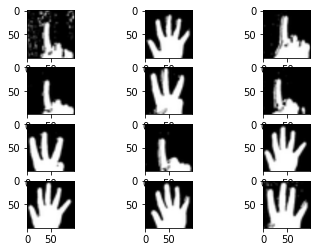

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=104, test_size=0.25, shuffle=True)

fig, ax = plt.subplots(4,3)
for i in range(4):
  for j in range(3):
    ax[i,j].imshow(X_train[3*i + j])

##Generator and Discriminator Model 

In [9]:
def generator_model():
  init = initializers.RandomNormal(stddev=0.05)
  generator = Sequential()
  generator.add(Dense(25*25*64, input_shape=(100,)))
  generator.add(Reshape((25, 25, 64)))
  generator.add(BatchNormalization())
  generator.add(Conv2DTranspose(32, kernel_size=5, strides=2, padding='same', activation='relu'))
  generator.add(BatchNormalization())
  generator.add(Conv2DTranspose(3, kernel_size=5, strides=2, padding='same', activation='tanh'))
  return generator

"""## define discriminator for model"""

def discriminator_model(shape):
  init = initializers.RandomNormal(stddev=0.05)
  discriminator = Sequential()
  discriminator.add(Conv2D(32, kernel_size=5, strides=2, padding='same',input_shape=(100,100,3)))
  discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation = 'leaky_relu'))
  discriminator.add(BatchNormalization())
  discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same', activation = 'leaky_relu'))
  discriminator.add(BatchNormalization())
  discriminator.add(Conv2D(256, kernel_size=5, strides=2, padding='same', activation = 'leaky_relu'))
  discriminator.add(BatchNormalization())
  discriminator.add(Conv2D(512, kernel_size=5, strides=2, padding='same', activation = 'leaky_relu'))
  discriminator.add(BatchNormalization())
  discriminator.add(Flatten())
  discriminator.add(Dense(1, activation='sigmoid'))
  return discriminator


In [10]:

input_shape = (100, 100, 3)

Y_train = np_utils.to_categorical(y_train, len(np.unique(y_train)))
Y_test = np_utils.to_categorical(y_test, len(np.unique(y_train)))


X_train2 = np.float32(X_train)
X_train2 = (X_train2 * 2) -1
X_train2 = np.clip(X_train2, -1, 1)

X_test2 = np.float32(X_test)
X_test2 = (X_test2 * 2) -1
X_test2 = np.clip(X_test2, -1, 1)


##Compile Model

In [27]:
generator = generator_model()
discriminator = discriminator_model(X_train2[0].shape)
print('\n')
print('generator summary: \n')
generator.summary()
discriminator.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

"""## Discriminator model visualization"""
print('\n')
print('discriminator summary: \n')
discriminator.summary()

"""## compile model"""

discriminator.trainable = False
z = Input(shape=(100,))
generated_image = generator(z)
print(generated_image.shape)
label = discriminator(generated_image)

GAN = Model(inputs=z, outputs=label)
GAN.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])




generator summary: 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40000)             4040000   
                                                                 
 reshape_2 (Reshape)         (None, 25, 25, 64)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 25, 25, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 50, 50, 32)       51232     
 ranspose)                                                       
                                                                 
 batch_normalization_13 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                               

##Fit the Model

epoch = 1/250, d_loss=1.272, g_loss=0.009                                                                                                     
1/1 [==============================] - 0s 81ms/step


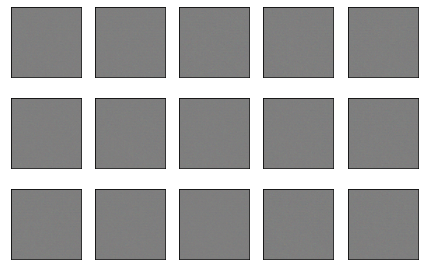

epoch = 2/250, d_loss=0.442, g_loss=0.006                                                                                                     
epoch = 3/250, d_loss=0.310, g_loss=0.001                                                                                                     
epoch = 4/250, d_loss=0.255, g_loss=0.003                                                                                                     
epoch = 5/250, d_loss=0.306, g_loss=0.004                                                                                                     
epoch = 6/250, d_loss=0.221, g_loss=0.003                                                                                                     
epoch = 7/250, d_loss=0.218, g_loss=0.003                                                                                                     
epoch = 8/250, d_loss=0.220, g_loss=0.003                                                                                                     

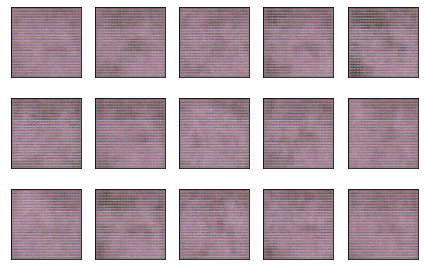

epoch = 17/250, d_loss=0.213, g_loss=0.001                                                                                                     
epoch = 18/250, d_loss=0.213, g_loss=0.000                                                                                                     
epoch = 19/250, d_loss=0.213, g_loss=0.000                                                                                                     
epoch = 20/250, d_loss=0.213, g_loss=0.000                                                                                                     
epoch = 21/250, d_loss=0.213, g_loss=0.000                                                                                                     
epoch = 22/250, d_loss=0.213, g_loss=0.000                                                                                                     
epoch = 23/250, d_loss=0.213, g_loss=0.000                                                                                              

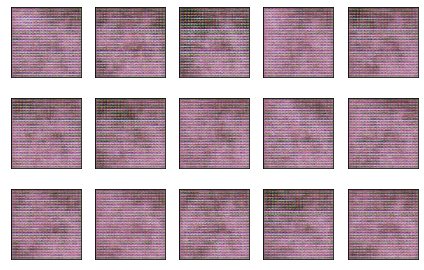

epoch = 32/250, d_loss=0.355, g_loss=0.017                                                                                                     
epoch = 33/250, d_loss=0.263, g_loss=0.386                                                                                                     
epoch = 34/250, d_loss=0.275, g_loss=2.107                                                                                                     
epoch = 35/250, d_loss=0.242, g_loss=9.421                                                                                                     
epoch = 36/250, d_loss=0.363, g_loss=14.676                                                                                                     
epoch = 37/250, d_loss=0.292, g_loss=2.865                                                                                                     
epoch = 38/250, d_loss=0.324, g_loss=0.790                                                                                             

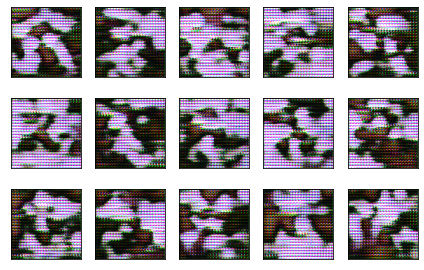

epoch = 47/250, d_loss=0.226, g_loss=0.222                                                                                                     
epoch = 48/250, d_loss=0.216, g_loss=0.278                                                                                                     
epoch = 49/250, d_loss=0.220, g_loss=0.384                                                                                                     
epoch = 50/250, d_loss=0.216, g_loss=0.400                                                                                                     
epoch = 51/250, d_loss=0.217, g_loss=0.436                                                                                                     
epoch = 52/250, d_loss=0.217, g_loss=0.424                                                                                                     
epoch = 53/250, d_loss=0.216, g_loss=0.462                                                                                              

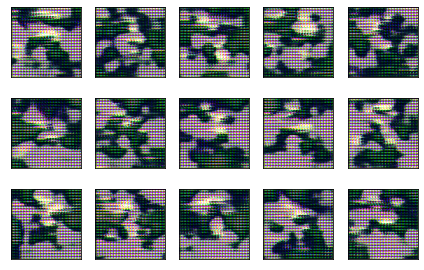

epoch = 62/250, d_loss=0.215, g_loss=0.548                                                                                                     
epoch = 63/250, d_loss=0.215, g_loss=0.502                                                                                                     
epoch = 64/250, d_loss=0.215, g_loss=0.470                                                                                                     
epoch = 65/250, d_loss=0.215, g_loss=0.476                                                                                                     
epoch = 66/250, d_loss=0.215, g_loss=0.468                                                                                                     
epoch = 67/250, d_loss=0.215, g_loss=0.445                                                                                                     
epoch = 68/250, d_loss=0.216, g_loss=0.436                                                                                              

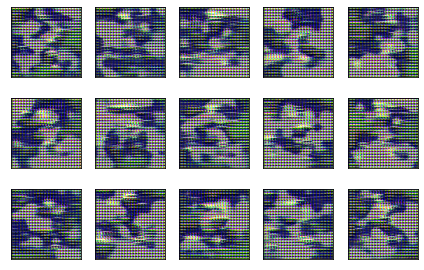

epoch = 77/250, d_loss=0.214, g_loss=0.367                                                                                                     
epoch = 78/250, d_loss=0.214, g_loss=0.350                                                                                                     
epoch = 79/250, d_loss=0.214, g_loss=0.352                                                                                                     
epoch = 80/250, d_loss=0.214, g_loss=0.349                                                                                                     
epoch = 81/250, d_loss=0.214, g_loss=0.328                                                                                                     
epoch = 82/250, d_loss=0.214, g_loss=0.326                                                                                                     
epoch = 83/250, d_loss=0.213, g_loss=0.322                                                                                              

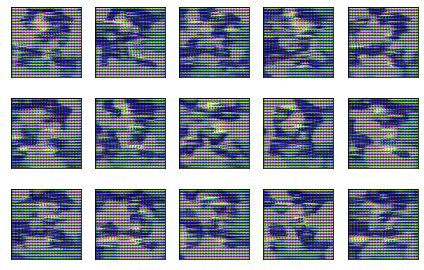

epoch = 92/250, d_loss=0.293, g_loss=0.298                                                                                                     
epoch = 93/250, d_loss=0.811, g_loss=0.606                                                                                                     
epoch = 94/250, d_loss=0.639, g_loss=0.000                                                                                                     
epoch = 95/250, d_loss=0.253, g_loss=0.003                                                                                                     
epoch = 96/250, d_loss=0.294, g_loss=0.132                                                                                                     
epoch = 97/250, d_loss=0.262, g_loss=0.003                                                                                                     
epoch = 98/250, d_loss=0.222, g_loss=0.014                                                                                              

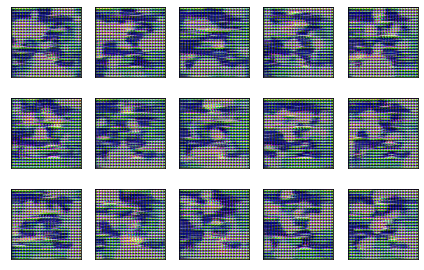

epoch = 107/250, d_loss=0.213, g_loss=0.154                                                                                                     
epoch = 108/250, d_loss=0.213, g_loss=0.157                                                                                                     
epoch = 109/250, d_loss=0.213, g_loss=0.162                                                                                                     
epoch = 110/250, d_loss=0.213, g_loss=0.162                                                                                                     
epoch = 111/250, d_loss=0.213, g_loss=0.166                                                                                                     
epoch = 112/250, d_loss=0.213, g_loss=0.165                                                                                                     
epoch = 113/250, d_loss=0.213, g_loss=0.164                                                                                       

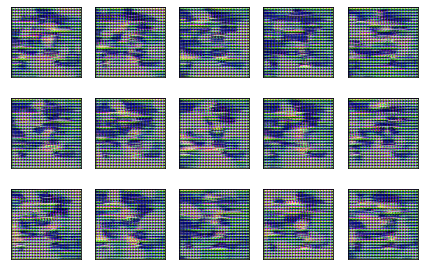

epoch = 122/250, d_loss=0.212, g_loss=0.164                                                                                                     
epoch = 123/250, d_loss=0.212, g_loss=0.160                                                                                                     
epoch = 124/250, d_loss=0.212, g_loss=0.160                                                                                                     
epoch = 125/250, d_loss=0.212, g_loss=0.159                                                                                                     
epoch = 126/250, d_loss=0.212, g_loss=0.160                                                                                                     
epoch = 127/250, d_loss=0.212, g_loss=0.161                                                                                                     
epoch = 128/250, d_loss=0.212, g_loss=0.161                                                                                       

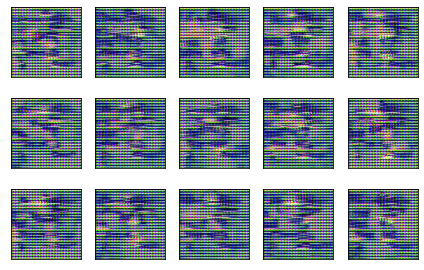

epoch = 137/250, d_loss=0.212, g_loss=0.173                                                                                                     
epoch = 138/250, d_loss=0.212, g_loss=0.175                                                                                                     
epoch = 139/250, d_loss=0.212, g_loss=0.182                                                                                                     
epoch = 140/250, d_loss=0.212, g_loss=0.182                                                                                                     
epoch = 141/250, d_loss=0.212, g_loss=0.186                                                                                                     
epoch = 142/250, d_loss=0.212, g_loss=0.189                                                                                                     
epoch = 143/250, d_loss=0.212, g_loss=0.191                                                                                       

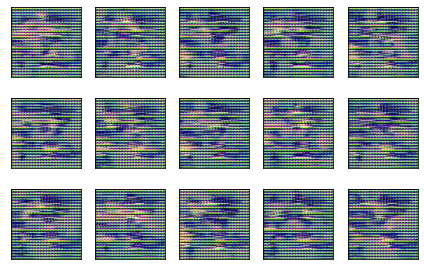

epoch = 152/250, d_loss=0.212, g_loss=0.212                                                                                                     
epoch = 153/250, d_loss=0.212, g_loss=0.216                                                                                                     
epoch = 154/250, d_loss=0.212, g_loss=0.221                                                                                                     
epoch = 155/250, d_loss=0.212, g_loss=0.223                                                                                                     
epoch = 156/250, d_loss=0.212, g_loss=0.223                                                                                                     
epoch = 157/250, d_loss=0.212, g_loss=0.226                                                                                                     
epoch = 158/250, d_loss=0.212, g_loss=0.244                                                                                       

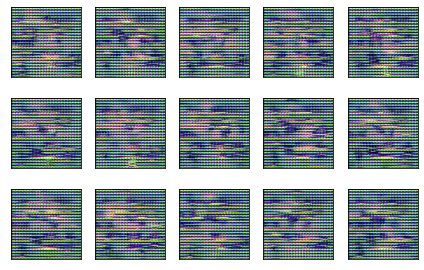

epoch = 167/250, d_loss=0.212, g_loss=0.596                                                                                                     
epoch = 168/250, d_loss=0.212, g_loss=0.623                                                                                                     
epoch = 169/250, d_loss=0.212, g_loss=0.660                                                                                                     
epoch = 170/250, d_loss=0.212, g_loss=0.688                                                                                                     
epoch = 171/250, d_loss=0.213, g_loss=0.723                                                                                                     
epoch = 172/250, d_loss=0.212, g_loss=0.799                                                                                                     
epoch = 173/250, d_loss=0.212, g_loss=0.904                                                                                       

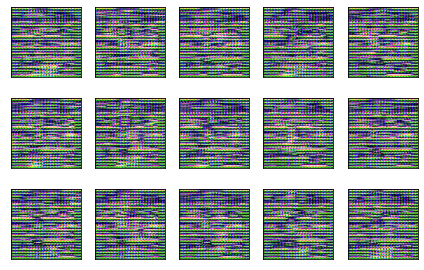

epoch = 182/250, d_loss=0.597, g_loss=2.648                                                                                                     
epoch = 183/250, d_loss=0.382, g_loss=0.194                                                                                                     
epoch = 184/250, d_loss=0.240, g_loss=0.060                                                                                                     
epoch = 185/250, d_loss=0.703, g_loss=1.129                                                                                                     
epoch = 186/250, d_loss=0.363, g_loss=0.025                                                                                                     
epoch = 187/250, d_loss=0.276, g_loss=2.261                                                                                                     
epoch = 188/250, d_loss=0.255, g_loss=0.396                                                                                       

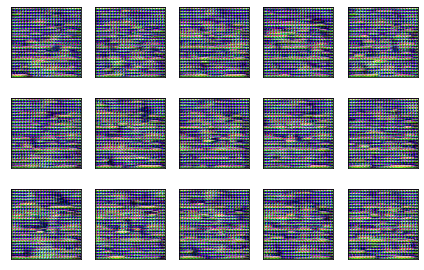

epoch = 197/250, d_loss=0.212, g_loss=1.474                                                                                                     
epoch = 198/250, d_loss=0.212, g_loss=1.582                                                                                                     
epoch = 199/250, d_loss=0.212, g_loss=1.623                                                                                                     
epoch = 200/250, d_loss=0.213, g_loss=1.605                                                                                                     
epoch = 201/250, d_loss=0.213, g_loss=1.594                                                                                                     
epoch = 202/250, d_loss=0.212, g_loss=1.608                                                                                                     
epoch = 203/250, d_loss=0.213, g_loss=1.594                                                                                       

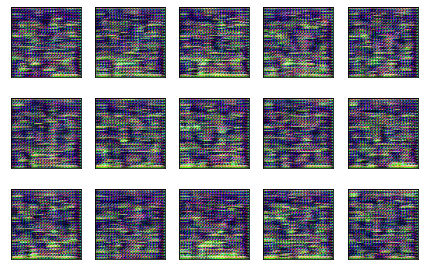

epoch = 212/250, d_loss=0.212, g_loss=1.409                                                                                                     
epoch = 213/250, d_loss=0.212, g_loss=1.397                                                                                                     
epoch = 214/250, d_loss=0.212, g_loss=1.387                                                                                                     
epoch = 215/250, d_loss=0.212, g_loss=1.373                                                                                                     
epoch = 216/250, d_loss=0.212, g_loss=1.378                                                                                                     
epoch = 217/250, d_loss=0.212, g_loss=1.465                                                                                                     
epoch = 218/250, d_loss=0.212, g_loss=1.488                                                                                       

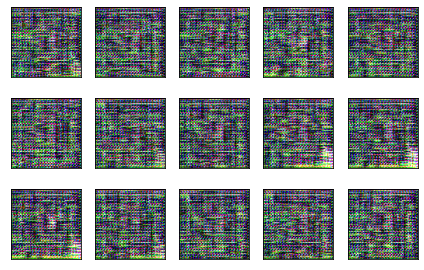

epoch = 227/250, d_loss=0.212, g_loss=1.619                                                                                                     
epoch = 228/250, d_loss=0.213, g_loss=1.579                                                                                                     
epoch = 229/250, d_loss=0.212, g_loss=1.640                                                                                                     
epoch = 230/250, d_loss=0.212, g_loss=1.641                                                                                                     
epoch = 231/250, d_loss=0.212, g_loss=1.644                                                                                                     
epoch = 232/250, d_loss=0.212, g_loss=1.658                                                                                                     
epoch = 233/250, d_loss=0.212, g_loss=1.679                                                                                       

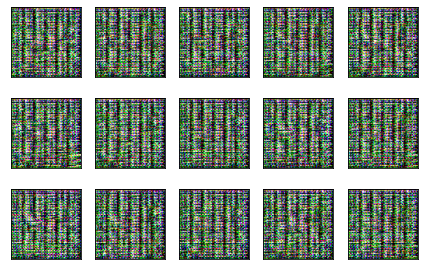

epoch = 242/250, d_loss=0.211, g_loss=1.575                                                                                                     
epoch = 243/250, d_loss=0.212, g_loss=1.559                                                                                                     
epoch = 244/250, d_loss=0.212, g_loss=1.558                                                                                                     
epoch = 245/250, d_loss=0.212, g_loss=1.555                                                                                                     
epoch = 246/250, d_loss=0.211, g_loss=1.558                                                                                                     
epoch = 247/250, d_loss=0.212, g_loss=1.568                                                                                                     
epoch = 248/250, d_loss=0.211, g_loss=1.570                                                                                       

In [28]:
epochs = 250
batch_size = 100
smooth = 0.15

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train2) // batch_size):
        

        discriminator.trainable = True
        X_batch = X_train2[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
        X_fake = generator.predict_on_batch(z)
        #print(X_fake.shape)
        gauss_noise=np.zeros((100,100,100,3),dtype=np.uint8)
        cv2.randn(gauss_noise[i][0],100,3)
        gauss_noise=(gauss_noise*0.5).astype(np.uint8)

        gn_img=X_fake[i] +gauss_noise
        d_loss_fake = discriminator.train_on_batch(x=gn_img, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        g_loss_batch = GAN.train_on_batch(x=z, y=real)

        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train2) // batch_size, d_loss_batch, g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    g_loss.append(g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], g_loss[-1]), 100*' ')

    if e % 15 == 0:
        samples = 15
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(3, 5, k + 1, xticks=[], yticks=[])
            plt.imshow(((x_fake[k] + 1)* 127).astype(np.uint8))

        plt.tight_layout()
        plt.show()


##Plot Model Loss

<ipython-input-29-b46560a2e794>:7: MatplotlibDeprecationWarning: Unrecognized location 'up right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Discriminator', 'Generator'], loc='up right')


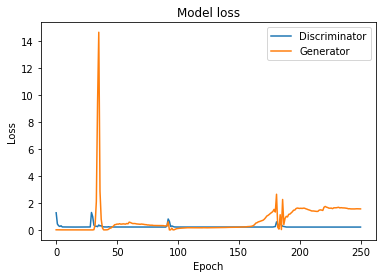

In [29]:

# plotting the metrics
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Generator'], loc='up right')
plt.show()